# NLP practicing

### this is practicing what can be found in the book: Hands-On Natural Language Processing with Python
### I added some other simple examples

In [1]:
import nltk

# modules that are required:
# 1 brown
# 2 gutenberg
# 3 max_ne_chunker
# 4 movie_reviews
# 5 product_reviews_1
# 6 punkt
# 7 treebank
# 8 twitter_samples
# 9 universal_tagset
# 10 webtext
# 11 wordnet
# 12 words
#nltk.download() # pop up window which helps downloading the modules or:
nltk.download('brown') # this way can be also
nltk.download('gutenberg')
nltk.download('max_ne_chunker')
nltk.download('movie_reviews')
nltk.download('product_reviews_1')
nltk.download('punkt')
nltk.download('treebank')
nltk.download('twitter_samples')
nltk.download('universal_tagset')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Gergo\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Gergo\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Error loading max_ne_chunker: Package 'max_ne_chunker' not
[nltk_data]     found in index
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Gergo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package product_reviews_1 to
[nltk_data]     C:\Users\Gergo\AppData\Roaming\nltk_data...
[nltk_data]   Package product_reviews_1 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gergo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Gergo\AppData\Roaming

True

In [2]:
import matplotlib.pyplot as plt

# Tokenization

In [3]:
from nltk.corpus import twitter_samples as ts

In [4]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [5]:
samples_tw = ts.strings('tweets.20150430-223406.json')

In [6]:
samples_tw[500]

'RT @Battsby: Ed Miliband appears to be dying on his lying arse here. \n\n#bbcqt \n\nThe spray-tanned mask is slipping.'

In [7]:
from nltk.tokenize import word_tokenize as wtoken

In [8]:
wtoken(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray-tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [9]:
from nltk.tokenize import wordpunct_tokenize as wtoken2

In [10]:
wtoken2(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [11]:
from nltk import regexp_tokenize

In [12]:
patn = '\w+'
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 'tanned',
 'mask',
 'is',
 'slipping']

In [13]:
#regular expression that detects words along with a few punctuation characters:
patn = '\w+|[!,\-,]' 
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping']

# Stemming

In [14]:
from nltk.stem import PorterStemmer

In [15]:
stemming = PorterStemmer()
print(stemming.stem("enjoying"),stemming.stem("enjoys"),stemming.stem("enjoyable"))

enjoy enjoy enjoy


In [16]:
# Stemming does not always produce a stem that is a word by itself, as shown in the following example:
print(stemming.stem("variation"),stemming.stem("variate"))

variat variat


In [17]:
#we can create custom stemmers, using the following regular expressions:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$",min=4)

In [18]:
print(regexp_stemmer.stem("flyable"),regexp_stemmer.stem("flying"))

fly fly


# Removing stop words

In [19]:
from nltk.corpus import stopwords
sw_l = stopwords.words('english')

In [20]:
print(len(sw_l),sw_l[20:40])

179 ['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [21]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [22]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

In [23]:
len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

69.26124197002142

In [24]:
# gutenberg content
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [25]:
bible = gutenberg.words('bible-kjv.txt')
words_in_bible_without_sw = [word for word in bible if word not in sw_l]

In [26]:
len(words_in_bible_without_sw)*100.0/len(bible)

62.6017410508443

In [27]:
len(words_in_bible_without_sw)

632687

In [28]:
vocabulary = set(words_in_bible_without_sw)
len(vocabulary)

13647

In [29]:
frequency_dist = nltk.FreqDist(words_in_bible_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['shall',
 'unto',
 'LORD',
 'thou',
 'said',
 'thee',
 'upon',
 'Israel',
 'king',
 'hath',
 'people',
 'came',
 'house',
 'come',
 'children',
 'land',
 'also',
 'shalt',
 'hand',
 'made',
 'went',
 'saying',
 'Then',
 'even',
 'saith',
 'every',
 'things',
 'sons',
 'Lord',
 'David']

### WordCloudVisualisation

In [30]:
#!pip install wordcloud
from wordcloud import WordCloud

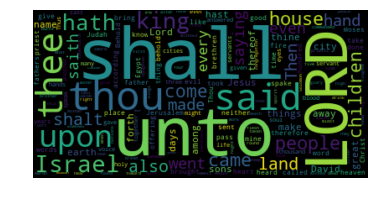

In [31]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
emma = gutenberg.words('austen-emma.txt')
words_in_emma_without_sw = [word for word in emma if word not in sw_l]

In [33]:
print("no stop words ratio:",len(words_in_emma_without_sw)*100.0/len(emma),"\nvocabulary:",len(set(words_in_emma_without_sw)))

no stop words ratio: 58.33277034927531 
vocabulary: 7682


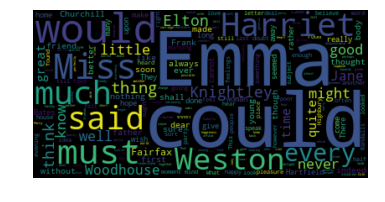

In [34]:
frequency_dist = nltk.FreqDist(words_in_emma_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploratory analysis of text

In [35]:
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
# Firefox discussion forum (firefox.txt)

In [36]:
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')
print(len(webtext_sentences),len(webtext_words))

1142 102457


In [37]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [38]:
frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

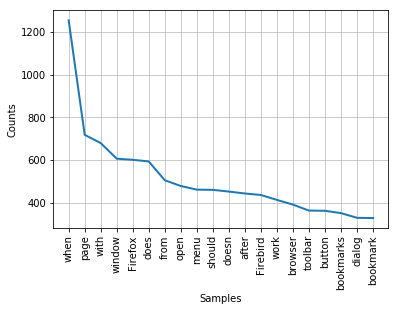

In [39]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(20,cumulative=False)
plt.show()

In [40]:
from wordcloud import WordCloud

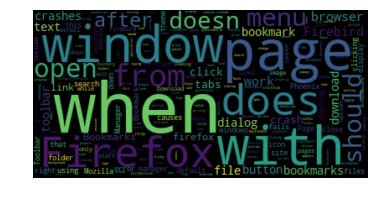

In [41]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# without stopwords
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]


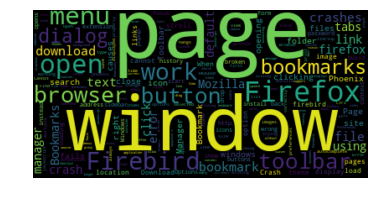

In [43]:
frequency_dist2 = nltk.FreqDist(words_in_webtext_without_sw)
large_words2 = dict([(k,v) for k,v in frequency_dist2.items() if len(k)>3])
frequency_dist3 = nltk.FreqDist(large_words2)
wcloud = WordCloud().generate_from_frequencies(frequency_dist3)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# POS tagging
#### categorizing the words in a sentence into specific syntactic or grammatical functions
* VERB: Verbs (all tenses and modes)
* NOUN: Nouns (common and proper)
* PRON: Pronouns
* ADJ: Adjectives
* ADV: Adverbs
* ADP: Adpositions (prepositions and postpositions)
* CONJ: Conjunctions
* DET: Determiners
* NUM: Cardinal numbers
* PRT: Particles or other function words
* X-other: Foreign words, typos, abbreviations
* .: Punctuation

In [44]:
from nltk.corpus import brown
brown.fileids()[:3]

['ca01', 'ca02', 'ca03']

In [45]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [46]:
brown.words(categories='adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

In [47]:
brown.words(fileids=['ca01'])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [48]:
brown.sents(categories=['adventure', 'adventure'])

[['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.'], ['He', 'was', 'well', 'rid', 'of', 'her', '.'], ...]

In [49]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [50]:
# In the first example, the word left is a verb, whereas it is a noun in the second example.
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")
nltk.pos_tag(text1,tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [51]:
nltk.pos_tag(text2,tagset='universal')

[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

In [52]:
example_sent = nltk.word_tokenize("The company is located in South Africa")
example_sent

['The', 'company', 'is', 'located', 'in', 'South', 'Africa']

In [53]:
tagged_sent = nltk.pos_tag(example_sent)
tagged_sent

[('The', 'DT'),
 ('company', 'NN'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('Africa', 'NNP')]

In [54]:
# ne_chunk recognize South Africa as a Geo Political Entity (GPE)
print(nltk.ne_chunk(tagged_sent))

(S
  The/DT
  company/NN
  is/VBZ
  located/VBN
  in/IN
  (GPE South/NNP Africa/NNP))


# Training our own tagger
### predict the POS tag for a given word in a sentence

In [55]:
# Potential predictive Features: extract the word prefixes and suffixes, and previous and neighboring words in the text for the training
# function: st:sentence ix: ixth word
# The function converts the text input into a dictionary of features: d_ft.
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0] # boolean: first letter is capital
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [56]:
# Packages needed for the next example
import re
from nltk import word_tokenize
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid

In [57]:
# perform how the sentence_features function works
text = "My leg was hurt severly last time when I was running."
tagged_text=re.findall(r"[\w']+", text) # split works only one separator, so here regular expressions need to be used
sentence_features(tagged_text, 10)


{'word': 'running',
 'dist_from_first': 10,
 'dist_from_last': 1,
 'capitalized': False,
 'prefix1': 'r',
 'prefix2': 'ru',
 'prefix3': 'run',
 'suffix1': 'g',
 'suffix2': 'ng',
 'suffix3': 'ing',
 'prev_word': 'was',
 'next_word': '',
 'numeric': False}

In [58]:
# perform how get_untagged_sentence works: here we need to have a tokenized input

text2 = word_tokenize(text)
tagged_text = nltk.pos_tag(text2)
get_untagged_sentence(tagged_text)

['My',
 'leg',
 'was',
 'hurt',
 'severly',
 'last',
 'time',
 'when',
 'I',
 'was',
 'running',
 '.']

In [59]:
# We will now use the treebank tagged sentences, with the universal tags as the labeled or training data:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')


In [60]:
# extract the features for each tagged sentence in the corpus, along with the training labels
def ext_ft(tg_sent):
    sent, tag = [], []
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg),index))
            tag.append(tg[index][1])
    return sent, tag
X,y = ext_ft(tagged_sentences)


In [61]:
# X is huge list of dictionary - y is the list of labels
print(len(X),"\n",X[1971],"\n", y[1971])

100676 
 {'word': 'few', 'dist_from_first': 8, 'dist_from_last': 12, 'capitalized': False, 'prefix1': 'f', 'prefix2': 'fe', 'prefix3': 'few', 'suffix1': 'w', 'suffix2': 'ew', 'suffix3': 'few', 'prev_word': 'a', 'next_word': 'meetings', 'numeric': False} 
 ADJ


In [63]:
# DictVectorizer to convert the feature-value dictionary to training vectors with automatic one-hot encoder
n_sample = 50000
#dict_vectorizer = DictVectorizer(sparse=False)
dict_vectorizer = DictVectorizer(sparse=True) # Changed this otherwise memory error may happen
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [64]:
# taining-test split 80%-20%
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [65]:
X_transformed.shape

(50000, 30857)

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\Gergo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [68]:
test_sentence = "My love is always mad at me."
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('My', 'NOUN')
('love', 'NOUN')
('is', 'VERB')
('always', 'ADV')
('mad', 'NOUN')
('at', 'ADP')
('me.', 'NOUN')


In [56]:
# USING THE NLTK SOLUTION
test_sentence = "My love is always mad at me."
patn = '\w+'
test_sentence_tok = regexp_tokenize(test_sentence,patn)
nltk.pos_tag(test_sentence_tok)

[('My', 'PRP$'),
 ('love', 'NN'),
 ('is', 'VBZ'),
 ('always', 'RB'),
 ('mad', 'JJ'),
 ('at', 'IN'),
 ('me', 'PRP')]

In [69]:
predictions = rf.predict(X_test)

In [70]:
accuracy_score(y_test,predictions)

0.9434

In [71]:
conf_matrix = confusion_matrix(y_test,predictions)

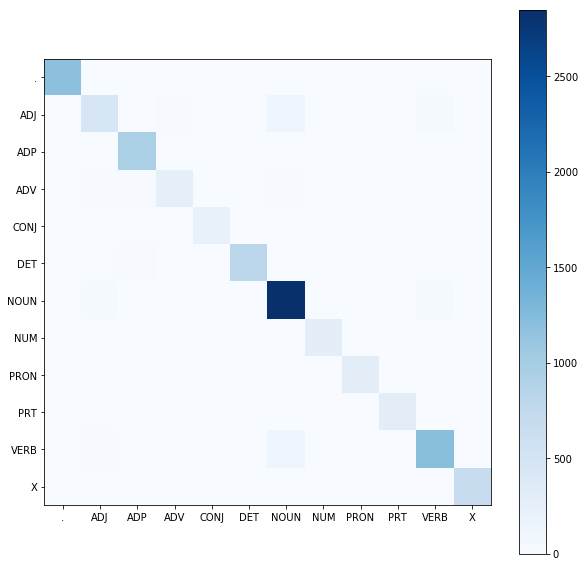

In [72]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [73]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('word=,', 0.02292188280033397), ('prefix1=*', 0.019405599280560175), ('prefix2=th', 0.017219722524519934), ('suffix2=he', 0.015337841633479742), ('capitalized', 0.013101023651599061), ('prefix2=,', 0.01291755614082173), ('suffix1=,', 0.01148706421988471), ('suffix1=d', 0.01080031098777565), ('dist_from_first', 0.009274676691594754), ('prefix3=.', 0.009166036800573336), ('suffix2=.', 0.008562759063709985), ('dist_from_last', 0.008357523735194472), ('word=.', 0.007802839375750029), ('prefix2=to', 0.007592774905502533), ('word=to', 0.007524963856087638), ('suffix2=ed', 0.007278434420811083), ('suffix1=*', 0.007214547379238651), ('prefix1=t', 0.007194225234115126), ('next_word=,', 0.006717515206717513), ('suffix1=.', 0.0065205954910887)]


### Random Forrest Parameter Tuning

In [80]:
#without crossvalidation
from sklearn.model_selection import ParameterGrid 
grid = { 
    "n_estimators": [10, 50, 75],
    "max_features": ['auto'],
    "max_depth": [None,2,3],
    "min_samples_split":[2, 4, 8],
    "min_samples_leaf":[1,4],
    "random_state":[1971]}

rfc = RandomForestClassifier()

In [81]:
test_scores = [] 
# loop through the parameter grid, set hyperparameters, save the scores 
for g in ParameterGrid(grid): 
    rfc.set_params(**g)  # ** is "unpacking" the dictionary 
    rfc.fit(X_train, y_train)
    test_scores.append(rfc.score(X_test, y_test))
 # find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores) 
print(test_scores[best_idx],ParameterGrid(grid)[best_idx]) 

0.9493 {'random_state': 1971, 'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [ ]:
# basically no improvement

In [82]:
rf = RandomForestClassifier(random_state=1971,n_estimators=75,min_samples_split=2,min_samples_leaf=1,
                            max_features ='auto',max_depth=None )
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=1971, verbose=0,
            warm_start=False)

In [84]:
print(rf.score(X_test, y_test))

0.9493


In [85]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [86]:
test_sentence = "My love is always mad at me."
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('My', 'NOUN')
('love', 'NOUN')
('is', 'VERB')
('always', 'ADV')
('mad', 'VERB')
('at', 'ADP')
('me.', 'NOUN')


##### Other technics

#### Gradient Boosting Grid

In [87]:
# The default GB's accuracy
gbc=GradientBoostingClassifier(random_state = 71 )
#Train the model using the training sets y_pred=clf.predict(X_test)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9104


In [74]:
learning_rate = [0.5, 0.1, 0.05]
#n_estimators = [64,100]
n_estimators = [100]
max_depths = [3,4]
#min_samples_split = [0.1,  0.4]
min_samples_split = [2]
#min_samples_leaf =[0.1,0.3]
min_samples_leaf =[1]
#max_features = [0.75,1.0]
max_features = [None]
random_state = [123]

gbc = GradientBoostingClassifier()

# Create a dictionary of hyperparameters to search
grid = {'learning_rate': learning_rate, 'n_estimators' : n_estimators, 'max_depth':max_depths, 
        'min_samples_split' : min_samples_split, 'min_samples_leaf' :min_samples_leaf ,'max_features': max_features,
        'random_state': random_state}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    gbc.set_params(**g)  # ** is "unpacking" the dictionary
    gbc.fit(X_train, y_train)
    test_scores.append(gbc.score(X_test, y_test))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.9389 {'random_state': 123, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.5}


In [76]:
# The default GB's accuracy
gbc=GradientBoostingClassifier(learning_rate=0.5,max_depth=4,random_state = 71 )
#Train the model using the training sets y_pred=clf.predict(X_test)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9362


In [77]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = gbc.predict(features)
    return zip(sentence, tags)

test_sentence = "My love is always mad at me."
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('My', 'NOUN')
('love', 'NOUN')
('is', 'VERB')
('always', 'ADV')
('mad', 'NOUN')
('at', 'ADP')
('me.', 'NOUN')


In [ ]:
# GB doesn't improve seemingly, but extremly slow compared to RF

# Training a sentiment classifier for movie reviews

In [62]:
# Based on the movie reviews corpus in NLTK
import random
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer # This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators
from sklearn.metrics import confusion_matrix

In [63]:
cats = movie_reviews.categories()
reviews = []
for cat in cats:
    for fid in movie_reviews.fileids(cat):
        review = (list(movie_reviews.words(fid)),cat)
        reviews.append(review)
random.shuffle(reviews) # reorganize the order of the list items

In [64]:
print(movie_reviews.categories(),len(reviews), len(reviews[0][0]))

['neg', 'pos'] 2000 609


In [65]:
# top 2k words, but symbols and stop words included
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words())
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0]
print(top_wd_in_reviews[:10],len(top_wd_in_reviews))

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in'] 2000


In [66]:
# this function check the presence of the top words in a review
# basically a binary feature set for modelling
def ext_ft(review,top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

In [67]:
# demonstration
ext_ft(reviews[0][0],top_wd_in_reviews)
#set(reviews[0][0])

{'word_present(,)': True,
 'word_present(the)': True,
 'word_present(.)': True,
 'word_present(a)': True,
 'word_present(and)': True,
 'word_present(of)': True,
 'word_present(to)': True,
 "word_present(')": True,
 'word_present(is)': True,
 'word_present(in)': True,
 'word_present(s)': True,
 'word_present(")': True,
 'word_present(it)': True,
 'word_present(that)': True,
 'word_present(-)': True,
 'word_present())': True,
 'word_present(()': True,
 'word_present(as)': True,
 'word_present(with)': False,
 'word_present(for)': True,
 'word_present(his)': True,
 'word_present(this)': True,
 'word_present(film)': False,
 'word_present(i)': True,
 'word_present(he)': True,
 'word_present(but)': True,
 'word_present(on)': True,
 'word_present(are)': True,
 'word_present(t)': True,
 'word_present(by)': True,
 'word_present(be)': True,
 'word_present(one)': True,
 'word_present(movie)': True,
 'word_present(an)': True,
 'word_present(who)': True,
 'word_present(not)': True,
 'word_present(yo

In [68]:
# for each review, the presence dictionary of the top words and the label
featuresets = [(ext_ft(d,top_wd_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]

In [69]:
featuresets[0][0]

{'word_present(,)': True,
 'word_present(the)': True,
 'word_present(.)': True,
 'word_present(a)': True,
 'word_present(and)': True,
 'word_present(of)': True,
 'word_present(to)': True,
 "word_present(')": True,
 'word_present(is)': True,
 'word_present(in)': True,
 'word_present(s)': True,
 'word_present(")': True,
 'word_present(it)': True,
 'word_present(that)': True,
 'word_present(-)': True,
 'word_present())': True,
 'word_present(()': True,
 'word_present(as)': True,
 'word_present(with)': False,
 'word_present(for)': True,
 'word_present(his)': True,
 'word_present(this)': True,
 'word_present(film)': False,
 'word_present(i)': True,
 'word_present(he)': True,
 'word_present(but)': True,
 'word_present(on)': True,
 'word_present(are)': True,
 'word_present(t)': True,
 'word_present(by)': True,
 'word_present(be)': True,
 'word_present(one)': True,
 'word_present(movie)': True,
 'word_present(an)': True,
 'word_present(who)': True,
 'word_present(not)': True,
 'word_present(yo

In [70]:
# NaiveBayesClassifier from NLTK
#
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.8


In [71]:
classifier.show_most_informative_features(20)

Most Informative Features
word_present(outstanding) = True              pos : neg    =     12.6 : 1.0
     word_present(mulan) = True              pos : neg    =      8.3 : 1.0
word_present(wonderfully) = True              pos : neg    =      7.1 : 1.0
    word_present(seagal) = True              neg : pos    =      6.6 : 1.0
     word_present(damon) = True              pos : neg    =      6.1 : 1.0
    word_present(poorly) = True              neg : pos    =      6.0 : 1.0
      word_present(lame) = True              neg : pos    =      5.1 : 1.0
     word_present(flynt) = True              pos : neg    =      5.0 : 1.0
    word_present(allows) = True              pos : neg    =      5.0 : 1.0
     word_present(awful) = True              neg : pos    =      4.9 : 1.0
     word_present(waste) = True              neg : pos    =      4.9 : 1.0
word_present(ridiculous) = True              neg : pos    =      4.9 : 1.0
    word_present(wasted) = True              neg : pos    =      4.8 : 1

In [72]:
dict_vectorizer=None 
def get_train_test(train_set,test_set):
    global dict_vectorizer
    dict_vectorizer = DictVectorizer(sparse=False)
    X_train, y_train = zip(*train_set)
    X_train = dict_vectorizer.fit_transform(X_train)
    X_test,y_test = zip(*test_set)
    X_test = dict_vectorizer.transform(X_test)
    return X_train,X_test,y_train,y_test

In [73]:
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [74]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.82


In [75]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
all_words_in_reviews = nltk.FreqDist(word.lower() for word in movie_reviews.words() if word not in stopwords_list)
top_words_in_reviews = [list(words) for words in zip(*all_words_in_reviews.most_common(2000))][0]

In [76]:
featuresets = [(ext_ft(d,top_words_in_reviews), c) for (d,c) in reviews]
train_set, test_set = featuresets[200:], featuresets[:200]
X_train,X_test,y_train,y_test = get_train_test(train_set,test_set)

In [77]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [78]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.83


In [79]:
features_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
features_list = sorted(features_list, key=lambda x: x[1], reverse=True)
print(features_list[0:20])

[('word_present(bad)', 0.01438008059816087), ('word_present(boring)', 0.0072060365996860784), ('word_present(worst)', 0.006842588672933367), ('word_present(stupid)', 0.006361375379507347), ('word_present(mess)', 0.005373744192868413), ('word_present(outstanding)', 0.00466157534214753), ('word_present(waste)', 0.0044958575063833855), ('word_present(awful)', 0.004420040101385544), ('word_present(life)', 0.004359863062995552), ('word_present(ridiculous)', 0.004321885085712153), ('word_present(dull)', 0.004035217935075046), ('word_present(supposed)', 0.0040055878953174666), ('word_present(also)', 0.0039358091052961), ('word_present(great)', 0.00338586283548435), ('word_present(perfectly)', 0.003374618863413953), ('word_present(poorly)', 0.003322330968467932), ('word_present(plot)', 0.0033114697654973184), ('word_present(wasted)', 0.0032221073468308987), ('word_present(wonderfully)', 0.0031914771648643165), ('word_present(hilarious)', 0.003133637348015096)]


# Training a bag-of-words classifier

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import twitter_samples

In [83]:
pos_tweets = [(string, 1) for string in twitter_samples.strings('positive_tweets.json')]
neg_tweets = [(string,0) for string in twitter_samples.strings('negative_tweets.json')]
pos_tweets.extend(neg_tweets)
comb_tweets = pos_tweets
random.shuffle(comb_tweets)
tweets,labels = (zip(*comb_tweets))

In [85]:
print(tweets[1],labels[1])

@SexyVixen75_ @ED_DURANCE aww sweetie :( Erica is very busy she cant reply to everyone ❤ try not to worry. 0


In [86]:
count_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=10000)
X = count_vectorizer.fit_transform(tweets)

In [97]:
from pandas import DataFrame
#a.toarray() or a.A - Return a dense ndarray representation of a matrix
print(DataFrame(X.A, columns=count_vectorizer.get_feature_names()).iloc[100:102,1000:1009].to_string())

     bring your  bringing  brings  brings you  britain  british_airways  bro  broadcast  broke
100           0         0       0           0        0                0    0          0      0
101           0         0       0           0        0                0    0          0      0


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.2,random_state=10)

In [99]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [100]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.753
[[775 214]
 [280 731]]


In [101]:
from nltk.corpus import stopwords
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=10000, stop_words=stopwords.words('english'))
X = tfidf.fit_transform(tweets)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.2,random_state=10)

In [103]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [104]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.725
[[777 212]
 [338 673]]


# QURAN

In [61]:
# http://www.gutenberg.org/cache/epub/3434/pg3434.txt
# download and play
k_path = 'C:\\datasets\\pg3434.txt'

In [62]:
file = open(k_path, mode='r', encoding="utf8") # 'r' is to read
text = file.read()
file.close()

In [63]:
print(text.split()[1000:1030])

['course,', 'the', 'prophet', 'par', 'excellence,', 'and', 'the', 'Koran', 'is', 'regarded', 'by', 'the', 'orthodox', 'as', 'nothing', 'less', 'than', 'the', 'eternal', 'utterance', 'of', 'Allah.', 'The', 'eulogy', 'pronounced', 'by', 'Carlyle', 'on', 'Muhammed', 'in']


In [64]:
words_in_koran_without_sw = [word for word in text.split() if word not in sw_l]

In [65]:
print("no stop words ratio:",len(words_in_koran_without_sw)*100.0/len(text.split()),"\nvocabulary:",len(set(words_in_koran_without_sw)))

no stop words ratio: 56.113031787189094 
vocabulary: 23415


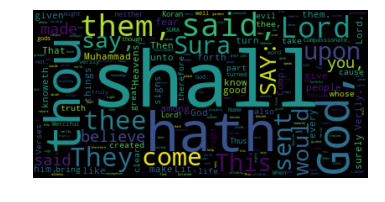

In [66]:
frequency_dist = nltk.FreqDist(words_in_koran_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

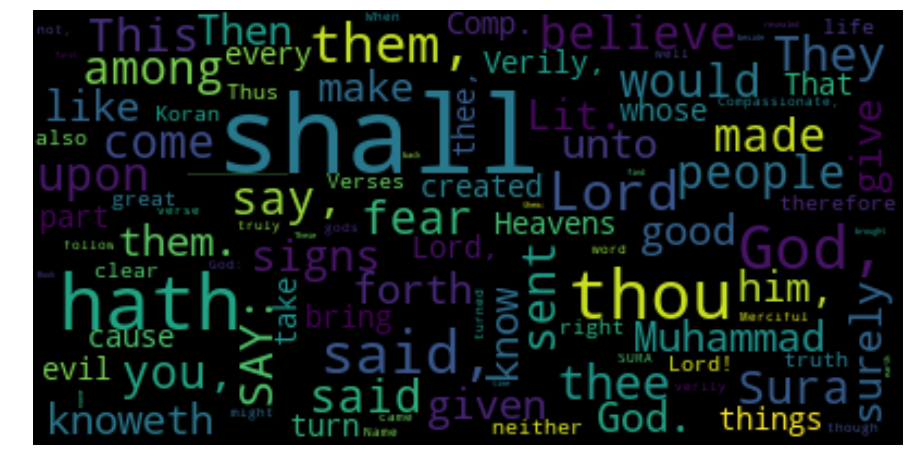

In [67]:
wcloud = WordCloud(max_font_size=50, max_words=100).generate_from_frequencies(frequency_dist)
plt.figure(figsize=[16,8])
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
frequency_dist['Muhammad']

201

In [69]:
frequency_dist['Jewish']

33

In [70]:
print('angel freq:',frequency_dist['angel'],'\nAngel freq:',frequency_dist['Angel'])

angel freq: 12 
Angel freq: 6
